# Example of downsampling and interpolating data with `romSpline`

In [1]:
# Import necessary modules
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

# Set plot font and size
font = {'size':14}
plt.rc('font', **font)

# Uncomment next two lines if romSpline is not in your PYTHONPATH
#import sys
#sys.path.append('/localdata/bkhamesra3/research_localdata/UsefulScripts/LIGO/LIGO_Scripts/LIGO_Waveforms_Scripts/')

import romspline, os

/localdata/bkhamesra3/softwares/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Make up some test data to show how to use the code.

Incidentally, this function is accesible with romSpline through 
the `TestData` class. There are options to add Gaussian
noise and/or high frequency oscillations to this otherwise 
smooth function. See the documentation for further details.

In [3]:
os.chdir('/numrel/NumRel/bkhamesra3/Finalized_Waveforms/Waveform_files/Completed/NonSpinning/D11_q2.00_a0.0_m200/data/Strain')

In [47]:
t, hp, hx, amp, phase = np.loadtxt('Strain_l2_m2.txt', unpack=True, usecols=(0,1,2,3,4))

idx = np.where(t>150)
t = t[idx]
hp = hp[idx]
hx = hx[idx]
amp = amp[idx]
phase = phase[idx]

t = t - t[amp == np.max(amp)]
print len(phase)

23112


Plot the test data to see how it looks.

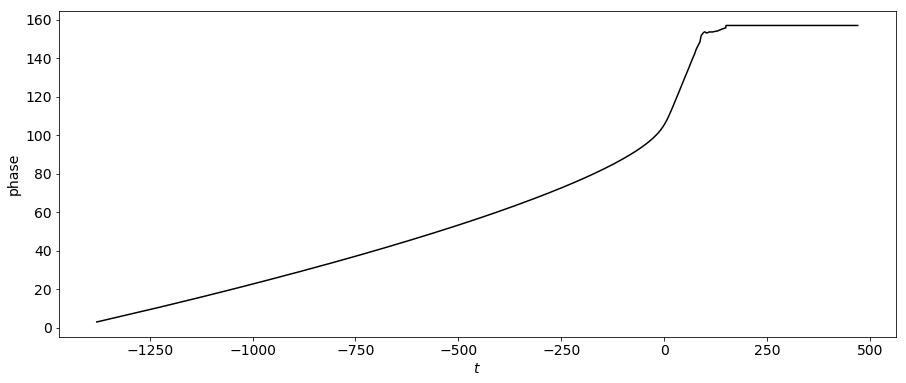

In [48]:
plt.figure(figsize=(15,6))
plt.plot(t, phase, 'k-');
plt.xlabel('$t$', fontsize=14);
plt.ylabel('phase', fontsize=14);
plt.tick_params(labelsize=14)

## Building a reduced-order spline

Create a reduced-order spline by making an instance of the `ReducedOrderSpline` class.

In [49]:
spline = romspline.ReducedOrderSpline(t, phase, verbose=True)

# Additional options include:
#     deg -- degree of interpolating spline polynomials (default is 5)
#     tol -- tolerance of greedy algorithm (default is 1e-6)
#     rel -- use relative errors if True (default is False)


Size 	Error
7 	21.20396846877557
8 	31.544827449829967
9 	83.05789655675522
10 	43.18171687299031
11 	26.725812604739367
12 	12.204741975734578
13 	10.845624607958882
14 	8.120150826657863
15 	5.823145055906565
16 	3.841008317889589
17 	3.6820800837643333
18 	3.6459789053385236
19 	3.466357609388252
20 	3.3707620197235
21 	3.043294221018101
22 	2.882302882932933
23 	2.531943734725644
24 	1.9787994577191625
25 	2.6850667484181656
26 	1.9768671332533927
27 	1.6842966503399737
28 	1.4152602645808656
29 	1.2171643993573866
30 	236.59059290244892
31 	128.80829732715372
32 	87.14268446420613
33 	81.58634402076636
34 	72.166727999832
35 	37.957115840617604
36 	34.83049049996487
37 	36.60413392415627
38 	23.59534062638923
39 	17.005138637480087
40 	24.612756449911302
41 	16.00201077235451
42 	12.157121970450305
43 	7.431049361923243
44 	7.418897181288912
45 	7.496138927177157
46 	5.372734435888219
47 	3.1782157830693336
48 	3.115717175430035
49 	3.5506487844129992
50 	2.7683859271854487
51 	2

356 	3.074015060633428e-05
357 	3.0696023088694346e-05
358 	3.0050229213429702e-05
359 	6.423603240079956e-05
360 	2.9637746891353345e-05
361 	2.8510491809186078e-05
362 	2.83161019609679e-05
363 	2.792944085427962e-05
364 	2.7698830265876495e-05
365 	2.756970613404519e-05
366 	2.7505249995840586e-05
367 	2.6915554315110057e-05
368 	2.6009288092154748e-05
369 	2.5998102699986703e-05
370 	2.5603121855510835e-05
371 	2.443293391252155e-05
372 	3.1108285543979264e-05
373 	3.18956303573259e-05
374 	2.9051507119959297e-05
375 	2.391180888139388e-05
376 	2.3769236193516008e-05
377 	2.368893751736323e-05
378 	2.3660885460685677e-05
379 	2.2527402592231738e-05
380 	2.2387210407259772e-05
381 	2.1939812796745173e-05
382 	2.180959310749131e-05
383 	2.1494363013019324e-05
384 	2.1419664648192338e-05
385 	2.072765841409918e-05
386 	3.103113774383104e-05
387 	2.0668299384851707e-05
388 	2.05862379800692e-05
389 	2.0458503534825923e-05
390 	1.950629280145222e-05
391 	1.916400131563023e-05
392 	2.550

701 	1.6853843973763105e-06
702 	3.2018126159272242e-06
703 	2.5063206541275918e-06
704 	1.670850252821765e-06
705 	2.1794210951497917e-06
706 	1.6019385995491575e-06
707 	1.5972223863514046e-06
708 	1.5839764646585763e-06
709 	1.5617306416970678e-06
710 	1.5546233598229264e-06
711 	1.7595542711745793e-06
712 	1.5530583254985686e-06
713 	1.5483100952451423e-06
714 	1.5478047572514697e-06
715 	1.5445342000930395e-06
716 	1.53578019279621e-06
717 	1.531147963973467e-06
718 	1.5212239361517277e-06
719 	1.5200346581423219e-06
720 	1.5184905421961048e-06
721 	2.6303521636350524e-06
722 	1.6180858821712718e-06
723 	1.651167192306957e-06
724 	1.480634260531133e-06
725 	1.4766700546786637e-06
726 	1.4758623763100331e-06
727 	1.476291458857304e-06
728 	1.4744197187610553e-06
729 	2.3012705128167e-06
730 	1.4711115188248414e-06
731 	1.4636651375354859e-06
732 	2.6306757892058386e-06
733 	3.3159361745305205e-06
734 	2.000634411913893e-06
735 	1.7441105875093399e-06
736 	1.4618926229559293e-06
737

Because data, namely, $x$ and $f(x)$, are given then the class goes ahead and builds the
reduced-order spline via a greedy algorithm. The number of optimal points and the 
resulting compression factor are:

In [50]:
print "Number of optimal points:", spline.size
print "Compression factor:", spline.compression

Number of optimal points: 793
Compression factor: 29.1450189155


Plot the max L-infinity errors that were found in building the "optimal" spline.
These errors are sometimes called "greedy errors" since they are computed
in a greedy algorithm. Notice that the decay is polynomial (power is deg+1) 
and not exponential. This is because the spline is only smooth to the degree of 
the polynomial used. For this reason, it's good not to set the tolerance too high 
(e.g., numerical round-off) as the time to generate spline might be impractically 
long.

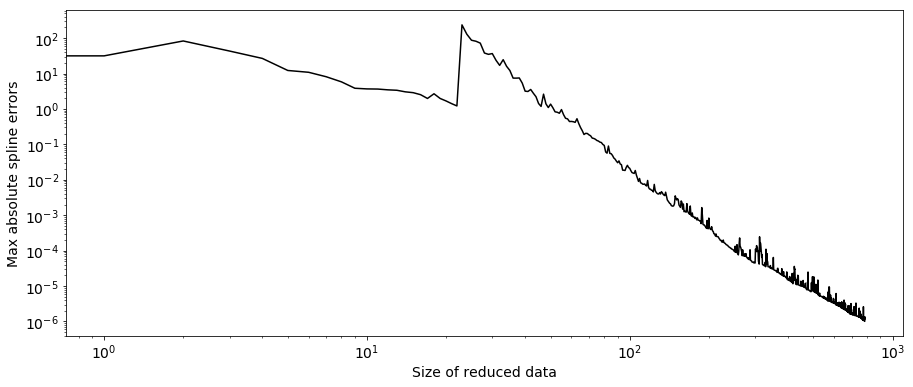

In [51]:

plt.figure(figsize=(15,6))
plt.loglog(spline.errors, 'k-');
plt.ylabel('Max absolute spline errors', fontsize=14);
plt.xlabel('Size of reduced data', fontsize=14);
plt.tick_params(labelsize=14)

The distribution of the "optimal" points (called $X$ in the code) 
is not uniform. Generally speaking, the density of the points is 
highest around the data that exhibits more variations.

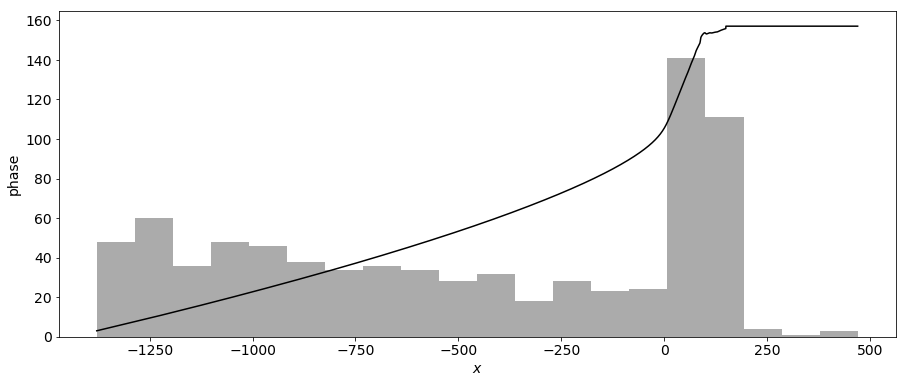

In [52]:
plt.figure(figsize=(15,6))
plt.hist(spline.X, 20, color='k', alpha=0.33)
plt.plot(t, phase, 'k-')
plt.xlabel('$x$', fontsize=14);
plt.ylabel('phase', fontsize=14);
plt.tick_params(labelsize=14)

## Evaluating a reduced-order spline

To evaluate the reduced-order spline let's first create an array of new randomly selected samples from the same interval as the `x` array:

In [53]:
import random
tt = np.sort([random.uniform(t.min(), t.max()) for ii in range(10000)])

Then use the `eval` method to evaluate the spline.

In [54]:
phi_spline = spline.eval(tt)

You could also just call `spline` directly as follows:

In [55]:
y2 = spline(tt)

Both ways of evaluating the spline are equivalent, namely, their difference is an array of zeros

In [56]:
np.all(np.abs(phi_spline-y2) == 0.)

True

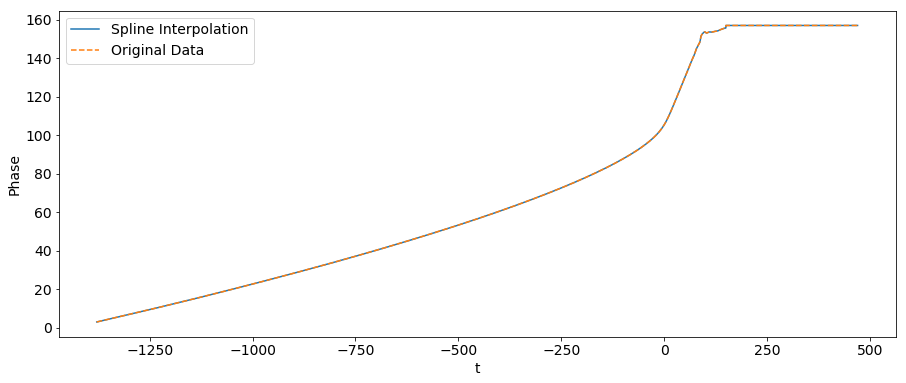

In [57]:
plt.figure(figsize=(15,6))
plt.plot(tt, phi_spline, label='Spline Interpolation')
plt.plot(t, phase,ls = '--', label='Original Data')
plt.xlabel('t', fontsize=14)
plt.ylabel('Phase', fontsize=14)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.show()

## Exporting/importing reduced-order spline data to/from file

`romSpline` provides functions to write the relevant spline interapolant data to HDF5 and text formats by calling the `write method`. The `write` method is fairly flexible as you can enter a filename, an HDF5 file descriptor, or an HDF5 group descriptor (if you have multiple reduced-order spline interpolants to export). 

In [13]:
# Write data to HDF5 file given a filename
spline.write("test1.h5")

# Write data to HDF5 file by passing a file descriptor
import h5py
with h5py.File('test1a.h5', 'w') as fd:
    spline.write(fd)

# Write data to HDF5 file by passing a group descriptor
with h5py.File('test1b.h5', 'w') as fd:
    group = fd.create_group('this_is_a_group')  # This is a group descriptor called "group"
    spline.write(group)

The interpolant data can also be written in a text format by simply passing a filename with ".txt" extension. The `write` method creates a directory with the given filename and creates a separate text file for each piece of interpolant data.

In [14]:
spline.write('test1.txt')

The `write` method has a keyword option called "slim" (default is False) that writes only the reduced data as well as the polynomial degree (`deg`) and greedy tolerance (`tol`). This is the minimum data needed to reconstruct the reduced-order spline interpolant. In particular, the array of greedy errors is not written to file when `slim` is True.

Next, let's pretend you've already saved the reduced-order spline data to file and want to reconstruct and evalute the interpolant. Fortunately, one doesn't need to rerun the greedy algorithm. Instead, use the `read` method of the `ReducedorderSpline` class.

In [15]:
s = romspline.ReducedOrderSpline()  # Don't initialize with anything
print "Is spline made/available?", s._made  # Reduced-order spline is not made/available

s.read('test1.h5')  # Load interpolant data
print "Is spline made/available?", s._made  # Reduced-order spline is made/available

Is spline made/available? False
Is spline made/available? True


You can check that data was actually loaded by simply evaluating the spline at the samples `xx`.

In [16]:
s(xx)

array([  5.35640964e-03,   7.32285038e-03,   2.30699407e-02, ...,
        -1.04102875e+01,  -1.05750724e+01,  -1.10961845e+01])

One doesn't need to create a ReducedOrderSpline object to import the data of a previously generated reduced-order spline if one uses the `readSpline` function. This function can read both HDF5 and text file formats provided that the files were created with romSpline's `write` function discussed above. Recall that the `write` function creates a directory of text files when requesting text format.

In [17]:
# Read from HDF5 file
s_h5 = romspline.readSpline('test1.h5')
print s_h5(xx)

# Read from text file(s)
s_txt = romspline.readSpline('test1.txt')
print s_txt(xx)

[  5.35640964e-03   7.32285038e-03   2.30699407e-02 ...,  -1.04102875e+01
  -1.05750724e+01  -1.10961845e+01]
[  5.35640964e-03   7.32285038e-03   2.30699407e-02 ...,  -1.04102875e+01
  -1.05750724e+01  -1.10961845e+01]


## Some other basic features and functions

The `ReducedOrderSpline` class comes with a function called `test` that simply compares the interpolated values of the reduced-order spline to some set of "truth" data, which in this example are the function values themselves. Below is shown the absolute difference between these two sets of values. Also plotted in blue is the tolerance of the greedy algorithm ($10^{-6}$ here).

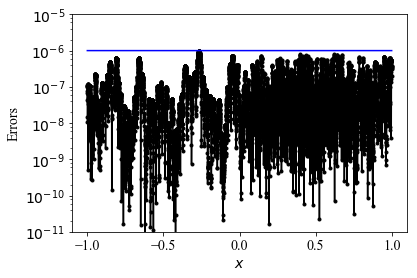

In [18]:
plt.semilogy(xx, spline.test(xx, f(xx)), 'k.-');
plt.semilogy(xx, spline.tol*np.ones_like(xx), 'b-');
plt.ylim(1e-11, 1e-5);
plt.xlabel('$x$');
plt.ylabel('Errors');

We can rerun the greedy algorithm to make a reduced-order spline with a different tolerance, for example. Using the same object `spline` (or you can create a new one), we run the greedy method:

In [19]:
spline.greedy(x, f(x), tol=1e-3)

When we made our first reduced-order spline above, we were actually calling the `greedy` method. When the `ReducedOrderSpline` class is initialized with data (i.e., samples and values) then the `greedy` method is executed on that data. If only values are given (i.e., no samples, like $x$) then the `greedy` method is executed but the samples are assumed to be integers from zero to the number of values less one.

And let's plot the interpolation errors at the samples `xx` like we did earlier.

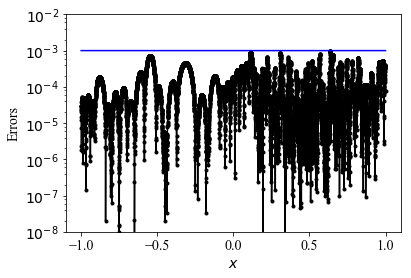

In [20]:
plt.semilogy(xx, spline.test(xx, f(xx)), 'k.-');
plt.semilogy(xx, spline.tol*np.ones_like(xx), 'b-');
plt.ylim(1e-8, 1e-2);
plt.xlabel('$x$');
plt.ylabel('Errors');

You can write this spline data to file, just as before.

In [21]:
spline.write('test2.h5')   # In HDF5 format
spline.write('test2.txt')  # In text format

A reduced-order spline can also be built where the tolerance is defined relative to the maximum of the abolute value of the data. This can be done using the `rel` option. The tolerance that is being input is the desired relative tolerance (i.e., $10^{-3}$ relative to the largest absolute data value).

In [22]:
spline.greedy(x, f(x), tol=1e-3, rel=True)

print "The compression factor is:", spline.compression
print "The (relative) tolerance requested is", spline._tol
print "The (absolute) tolerance used is:", spline.tol, spline._tol * np.max(np.abs(f(x)))

The compression factor is: 1587.31746032
The (relative) tolerance requested is 0.001
The (absolute) tolerance used is: 0.179373340905 0.179373340905


Let's plot the interpolation error on the random samples `xx` to see how they compare to the relative tolerance, which the code translates into an absolute tolerance that depends on the largest absolute data value in the array.

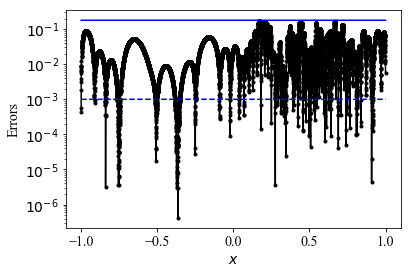

In [23]:
plt.semilogy(xx, spline.test(xx, f(xx)), 'k.-', 
            xx, spline._tol*np.ones(xx.size), 'b--',  # Requested relative tolerance (_tol)
            xx, spline.tol*np.ones(xx.size), 'b-'     # Actual absolute tolerance used (tol)
);
plt.xlabel('$x$');
plt.ylabel('Errors');

## Reduced-order splines and derivatives

The spline interpolation functionality is achieved using `scipy.interpolate`'s class called  `UnivariateSpline`. As a result, we have direct access to derivatives of the spline. The number of derivatives available to us equals to the polynomial degree used to build the spline. Otherwise, `UnivariateSpline` throws an error.

Let's build a spline with absolute tolerance of $10^{-3}$ and using fifth degree polynomials.

In [24]:
spline = romspline.ReducedOrderSpline(x, f(x), tol=1e-3)
print "Size of spline =", spline.size
print "Compression factor =", spline.compression

Size of spline = 151
Compression factor = 662.258278146


The first derivative of the spline on the random samples `xx` is found by evaluating the spline as described (recall, there are two ways to do this) above but entering an integer (for the number of derivatives we want) for the `dx` option:

In [25]:
spline(x, dx=1)

array([   79.34054226,    79.31150202,    79.28244828, ..., -1603.17786564,
       -1603.2364301 , -1603.29495813])

However, we will incur some additional errors because the interpolation approximation is being differentiated, not the function data. To see this more clearly, we can build a reduced-order spline for the first derivative of the function values, which can be calculated analytically:

In [26]:
def dfdx(x):
    """Analytic derivative of f(x) test data"""
    a = 10.*(-0.2+x)*(1.+x)*np.cos(5.*(-0.2 + x)**2)
    b = 100.*np.exp(-50.*(-0.5+x)**2)*np.cos(100.*x)
    c = np.sin(5.*(-0.2+x)**2)
    d = -100.*np.exp(-50.*(-0.5+x)**2)*(-0.5+x)*np.sin(100.*x)
    return 100.*(a+b+c+d)

Now, generate the reduced-order spline for the `dfdx` data and plot the derivative of the spline together with the spline of the derivative.

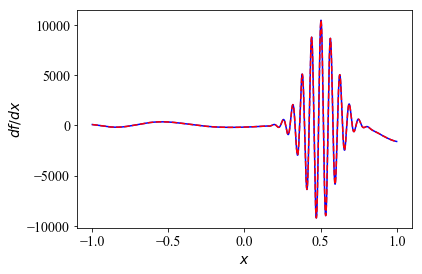

In [27]:
# Reduced-order spline of the analytic derivative:
dspline = romspline.ReducedOrderSpline(x, dfdx(x), tol=1e-3)

plt.plot(xx, spline(xx, dx=1), 'b-');  # Derivative of spline built for f(x)
plt.plot(xx, dspline(xx), 'r--');      # Spline built for derivative of f(x)
plt.xlabel('$x$');
plt.ylabel('$df/dx$');

By the eyeball norm the two interpolation predictions seem to agree but there actually is a difference in this case. The spline computed for the derivative of the data tends to be more accurate than computing the derivative of the spline built for the $f(x)$ data.

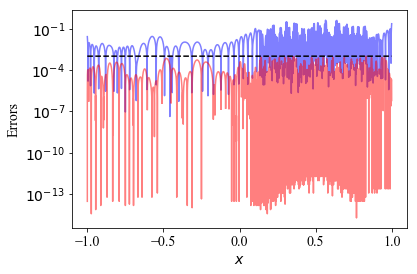

In [28]:
y = f(x)      # Store function values
y1 = dfdx(x)  # Store analytically calculated derivative

# This tests the first derivative of the spline prediction and compares to y1
plt.semilogy(x, spline.test(x, y1, dx=1), 'b-', alpha=0.5);  

# This tests the spline prediction of the first derivative of the data 
# and compares to y1
plt.semilogy(x, dspline.test(x, y1), 'r-', alpha=0.5);

plt.semilogy(x, dspline.tol*np.ones(x.size), 'k--');
plt.ylabel('Errors');
plt.xlabel('$x$');

As you can see above, the red curve is below the tolerance used in the greedy algorithm (i.e., $10^{-3}$). Note that the plot is generated at the samples $x$ used to train the greedy algorithm for building both splines. However, only the spline built from the derivatives of the data are actually guaranteed to have errors below the tolerance.

To summarize, you can compute derivatives with a reduced-order spline (or, any other spline, in fact) but additional errors will be accrued in the process. So, please have this in mind if your application involves derivatives. You can retain accuracy by instead building a reduced-order spline specifically for the derivatives.

If we didn't have access to the analytical derivative of the data then we can use finite-difference differentiation to numerically compute the derivative and build a spline for that data. This is achieved using the `D` function in `romSpline`.

In [29]:
# Compute numerical derivative of data
Df = romspline.D(f(x), x)  # Default options: dx=1, order=4

# Build a reduced-order spline for the numerical derivative
Dspline = romspline.ReducedOrderSpline(x, Df, tol=1e-3)
print "Size of spline =", Dspline.size
print "Compression factor =", Dspline.compression

# Notice that more points are needed for the derivative. This happens
# because we are imposing a tol on the *absolute* error of 1e-3 here
# and the derivative is large for some values of x.

Size of spline = 355
Compression factor = 281.692957746


Notice that the reduced data size is larger for building a reduced-order spline for the derivative of the data. This happens, in part, because we are imposing an absolute tolerance of $10^{-3}$ here and the derivative can be large at some samples.

As in the case with the analytical derivatives studied above, the spline built from the numerical derivative (`Dspline`) is more accurate than evaluating the derivative of the spline built from the original data (`spline`).

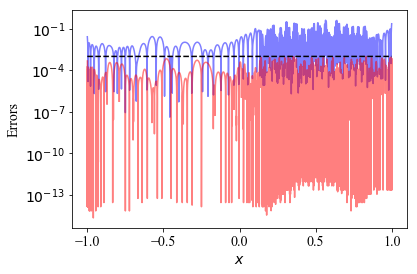

In [30]:
plt.semilogy(x, spline.test(x, y1, dx=1), 'b-', alpha=0.5);
plt.semilogy(x, Dspline.test(x, Df), 'r-', alpha=0.5);
plt.semilogy(x, Dspline.tol*np.ones(x.size), 'k--');
plt.xlabel('$x$');
plt.ylabel('Errors');

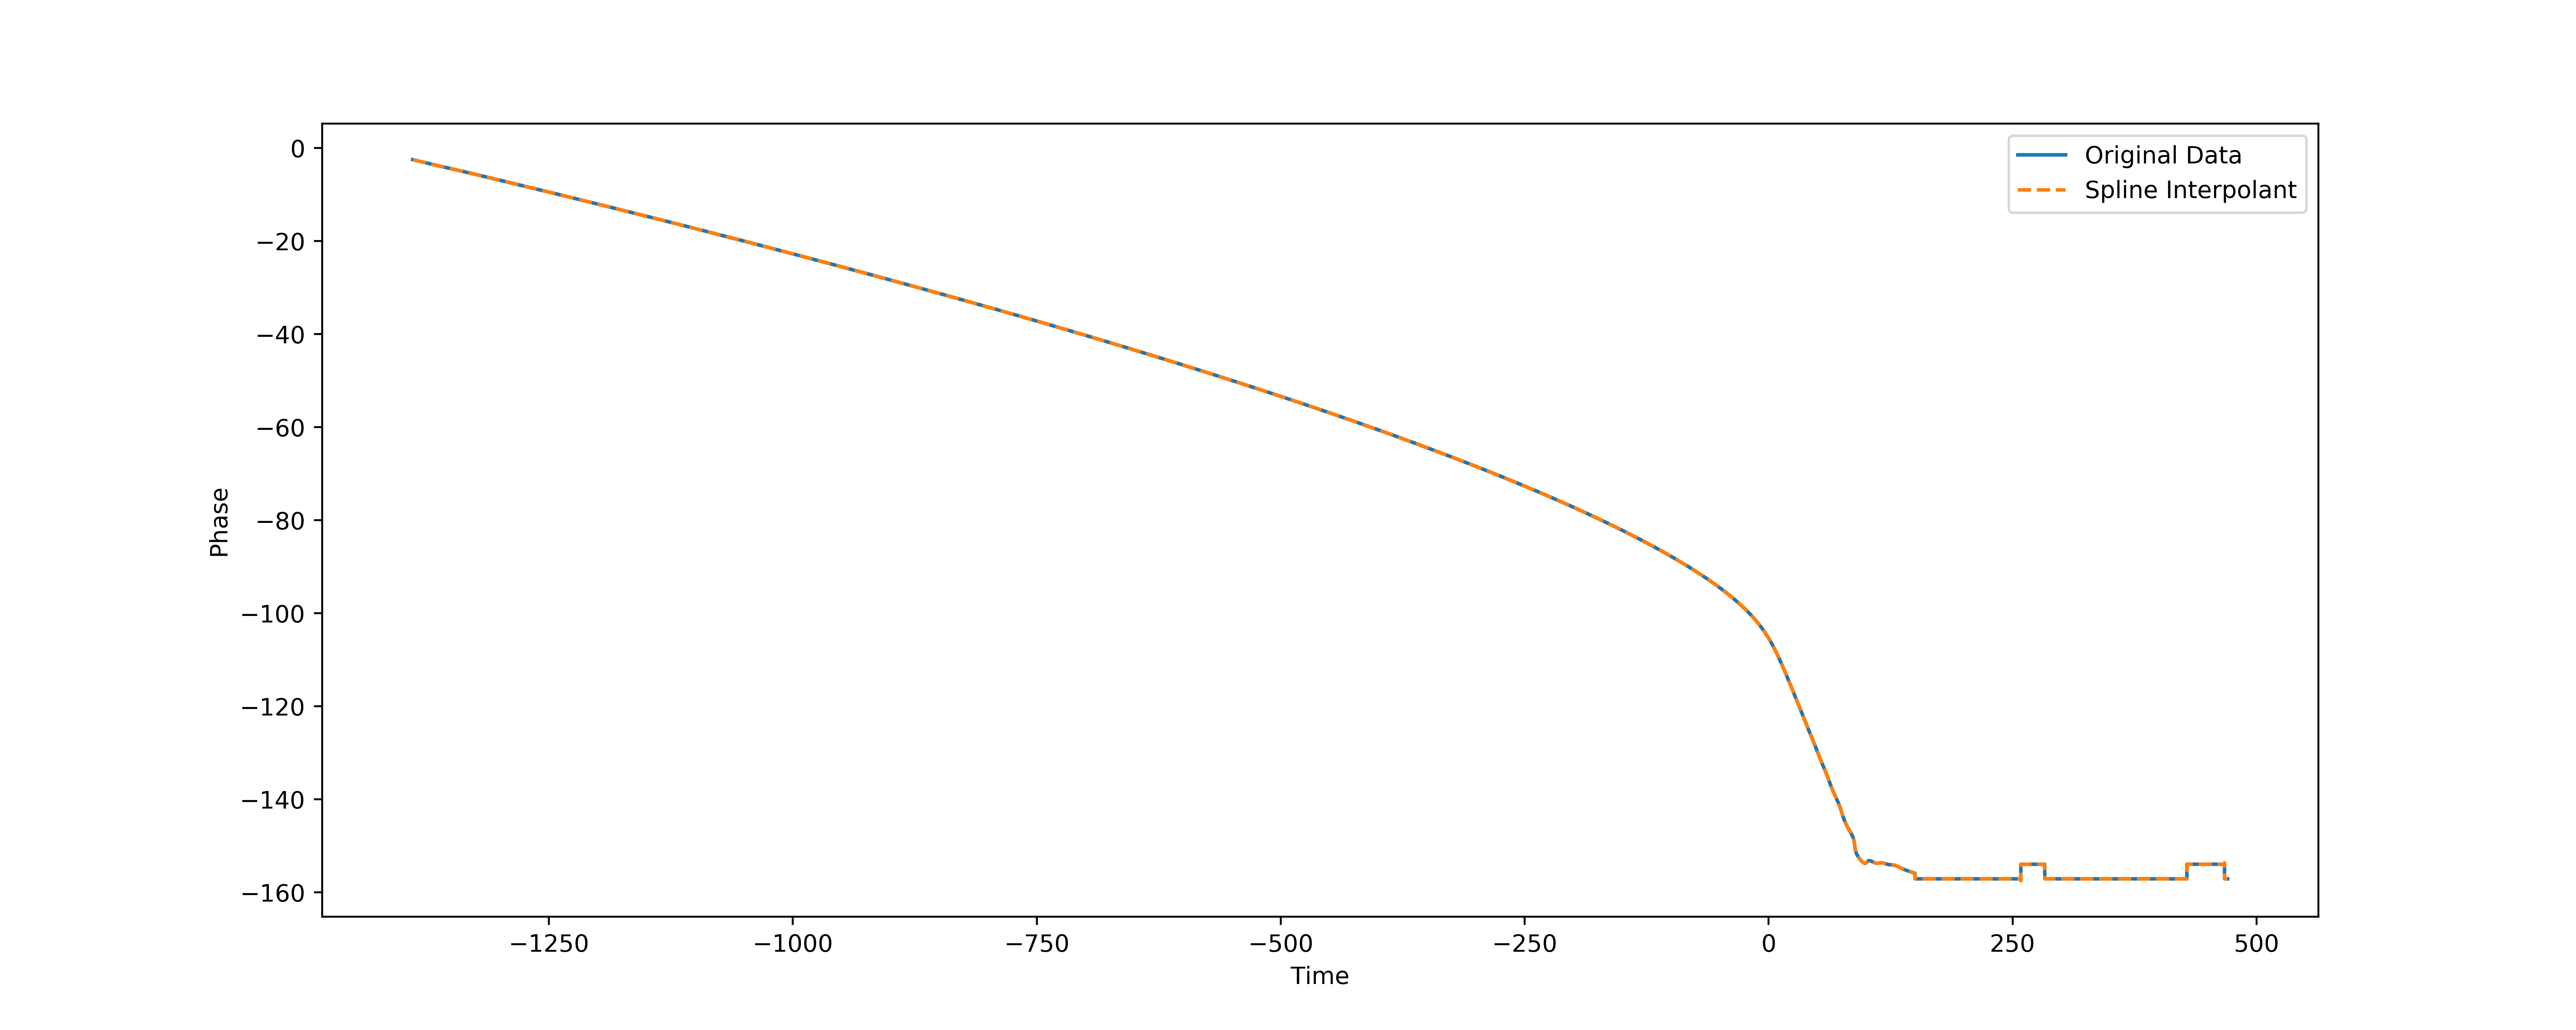

In [61]:
from IPython.display import Image
Image("/numrel/NumRel/bkhamesra3/Finalized_Waveforms/Waveform_files/Completed/NonSpinning/D11_q2.00_a0.0_m200/figures/Phase_22_Comparison.png")
